<a href="https://colab.research.google.com/github/khadar541/HeartDiseasePrediction/blob/main/heart_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape

(303, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df['target'].value_counts()

,count
target,
1,165
0,138


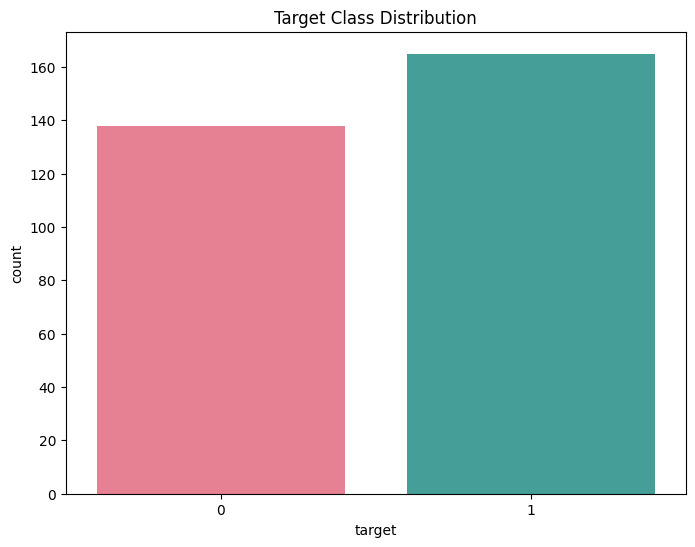

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', hue='target', data=df, palette='husl', legend=False)
plt.title('Target Class Distribution')
plt.show()

**✅ Code to create X and y**

In [16]:
# Separate features and target
X = df.drop('target', axis=1)   # All columns except target
y = df['target']                # Only the target column

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (303, 13)
y shape: (303,)


In [19]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


**split them into training and testing**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


**Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the logistic regression model
model = LogisticRegression(max_iter=5000)  # increase iterations to ensure convergence
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(accuracy * 100, 2), "%")

print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 88.52 %

📊 Confusion Matrix:
 [[25  4]
 [ 3 29]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**. Correlation with target**

In [33]:


# Compute correlation of all features with target
corr_target = df.corr()['target'].sort_values(ascending=False)

print(corr_target)


target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


In [34]:
(25+29)/(25+29+4+3)

0.8852459016393442

In [35]:
# Predict on test set (if scaled, use X_test_scaled)
y_pred = model.predict(X_test)  # or X_test_scaled if you scaled

# Show first 10 predictions vs actual values
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.values[i]}")


Predicted: 0, Actual: 0
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1


**1️⃣ Prediction for a new patient**

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)

       # Transform test data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [42]:
import pandas as pd

# New patient as a DataFrame (columns must match training X)
new_patient = pd.DataFrame({
    'age': [60],
    'sex': [1],
    'cp': [3],
    'trestbps': [145],
    'chol': [250],
    'fbs': [0],
    'restecg': [1],
    'thalach': [160],
    'exang': [0],
    'oldpeak': [1.5],
    'slope': [2],
    'ca': [0],
    'thal': [2]
})

# Scale the new patient using the fitted scaler
new_patient_scaled = scaler.transform(new_patient)

# Predict
prediction = model.predict(new_patient_scaled)
probability = model.predict_proba(new_patient_scaled)[:,1]

print("Prediction (0=No, 1=Yes):", prediction[0])
print("Probability of heart disease:", round(probability[0]*100,2), "%")


Prediction (0=No, 1=Yes): 1
Probability of heart disease: 93.08 %
